### Importing Libraries

In [10]:
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns


### Load and Display Dataset

In [11]:
def load_dataset (csv_file):
    """Function to return dataframes if filename is given"""
    base_path = os.getcwd() +'/store-sales-time-series-forecasting/'
    dataset = pd.read_csv(base_path + csv_file)
    return dataset

train = load_dataset("train.csv")
test = load_dataset("test.csv")
oil = load_dataset("oil.csv")
stores = load_dataset("stores.csv")
transactions = load_dataset("transactions.csv")
holiday_events = load_dataset("holidays_events.csv")
display(train.head())
display(test.head())

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


### Exploratory Data Analysis

In [12]:
# **Checking for empty values **
print ("*** train dataset ***")
print(train.isna().sum())
print ("*** test dataset ***")
print(test.isna().sum())

*** train dataset ***
id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64
*** test dataset ***
id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64


#### Changing to date-time format

In [13]:
def datetime(df, col):
    df["date"] = pd.to_datetime(df[col])
    df["year"] = df["date"].dt.year
    df["month"] = df["date"].dt.month
    df["day"] = df["date"].dt.day
    df["day_of_week"] = df["date"].dt.day_of_week
    df["day_name"] = df["date"].dt.day_name()
    df["quarter"] = df["date"].dt.quarter
    df["is_leap_year"] = df["date"].dt.is_leap_year
    return df
train = datetime(train, "date")
test =  datetime(test, "date")

#display dataset
display(train.head())
display(test.head())

,id,date,store_nbr,family,sales,onpromotion,year,month,day,day_of_week,day_name,quarter,is_leap_year
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,2013,1,1,1,Tuesday,1,False
1,1,2013-01-01,1,BABY CARE,0.0,0,2013,1,1,1,Tuesday,1,False
2,2,2013-01-01,1,BEAUTY,0.0,0,2013,1,1,1,Tuesday,1,False
3,3,2013-01-01,1,BEVERAGES,0.0,0,2013,1,1,1,Tuesday,1,False
4,4,2013-01-01,1,BOOKS,0.0,0,2013,1,1,1,Tuesday,1,False


,id,date,store_nbr,family,onpromotion,year,month,day,day_of_week,day_name,quarter,is_leap_year
0,3000888,2017-08-16,1,AUTOMOTIVE,0,2017,8,16,2,Wednesday,3,False
1,3000889,2017-08-16,1,BABY CARE,0,2017,8,16,2,Wednesday,3,False
2,3000890,2017-08-16,1,BEAUTY,2,2017,8,16,2,Wednesday,3,False
3,3000891,2017-08-16,1,BEVERAGES,20,2017,8,16,2,Wednesday,3,False
4,3000892,2017-08-16,1,BOOKS,0,2017,8,16,2,Wednesday,3,False


In [14]:
train['sales'].sum()

1073644952.2030689

In [17]:
train.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion', 'year',
       'month', 'day', 'day_of_week', 'day_name', 'quarter', 'is_leap_year'],
      dtype='object')

### Plots

#### Sales & Time

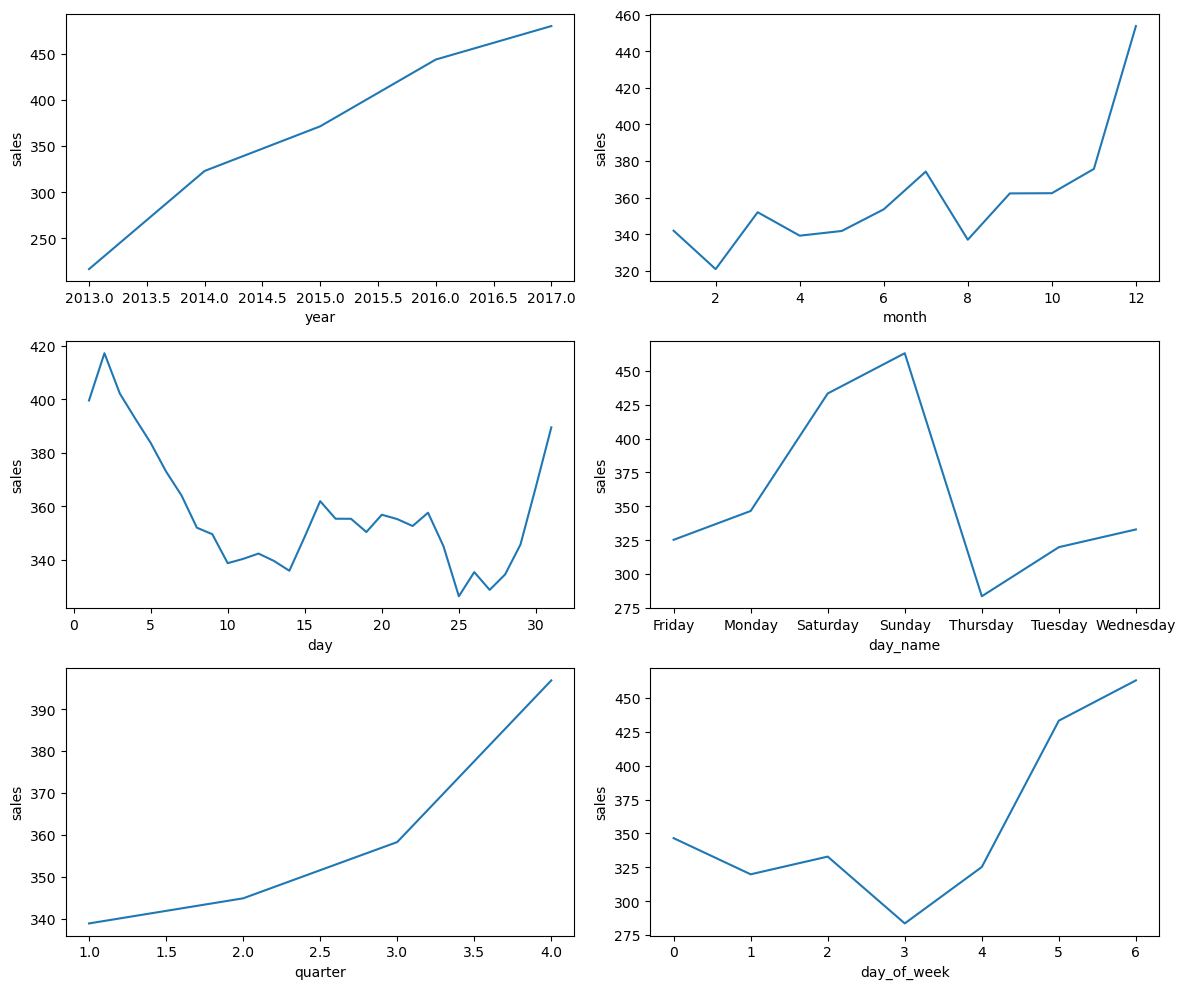

In [15]:
# relation between sales and days
# Average sales per day,week, month & year
grouping_columns = ['year', 'month', 'day', 'day_name', 'quarter', 'day_of_week']

fig, axes = plt.subplots(3, 2, figsize=(12, 10))
axes = axes.flatten()

for ind, column in enumerate(grouping_columns):
    grouped_data = train.groupby(column)['sales'].mean()
    grouped_data = pd.DataFrame(grouped_data).reset_index()
    sns.lineplot(data=grouped_data,  x=column, y='sales', ax=axes[ind])
plt.tight_layout()
plt.show()

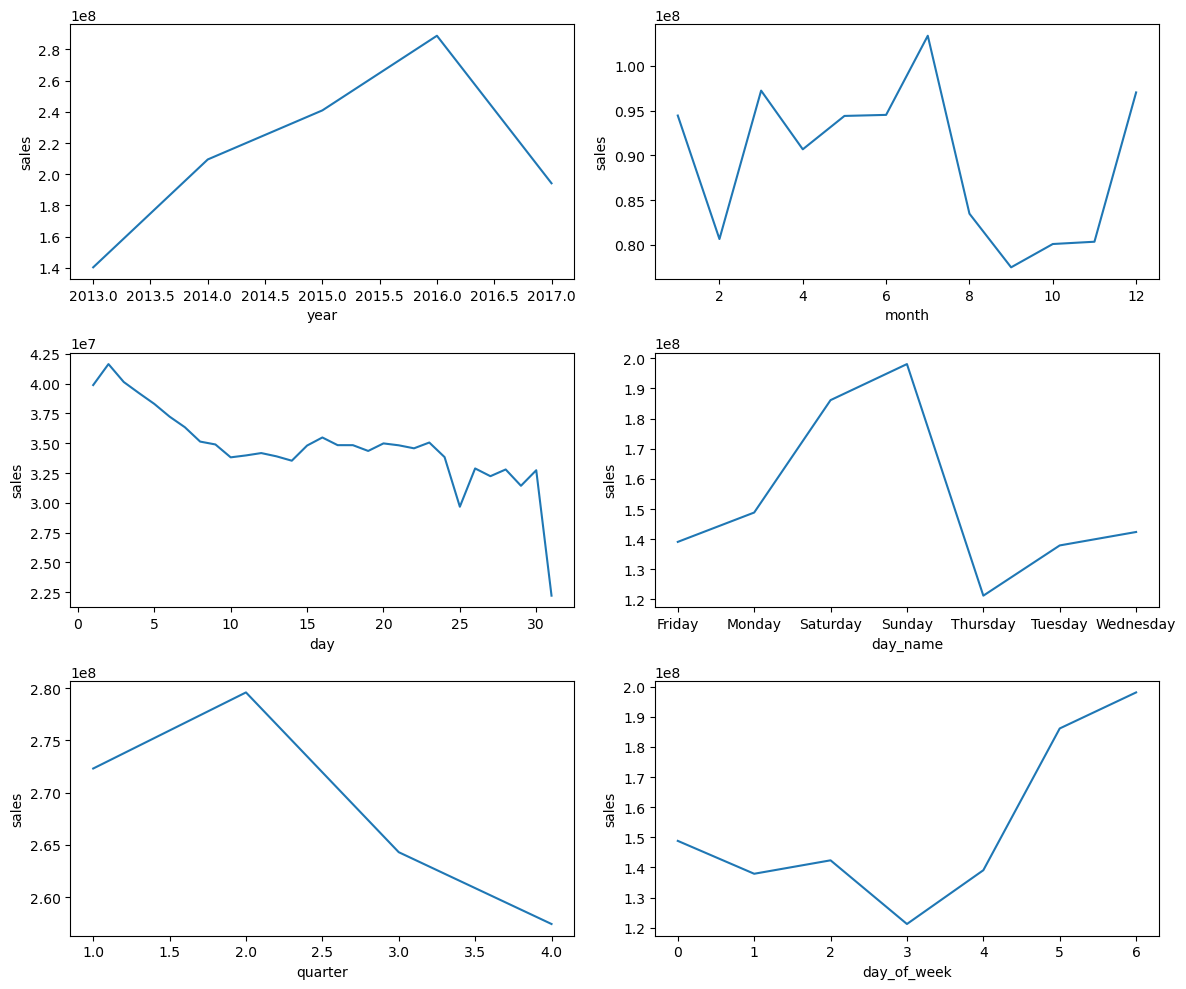

In [16]:
# Total sales per day,week, month & year
grouping_columns = ['year', 'month', 'day', 'day_name', 'quarter', 'day_of_week']

fig, axes = plt.subplots(3, 2, figsize=(12, 10))
axes = axes.flatten()

for ind, column in enumerate(grouping_columns):
    grouped_data = train.groupby(column)['sales'].sum()
    grouped_data = pd.DataFrame(grouped_data).reset_index()
    sns.lineplot(data=grouped_data,  x=column, y='sales', ax=axes[ind])
plt.tight_layout()
plt.show()

#### sales & family (categories)

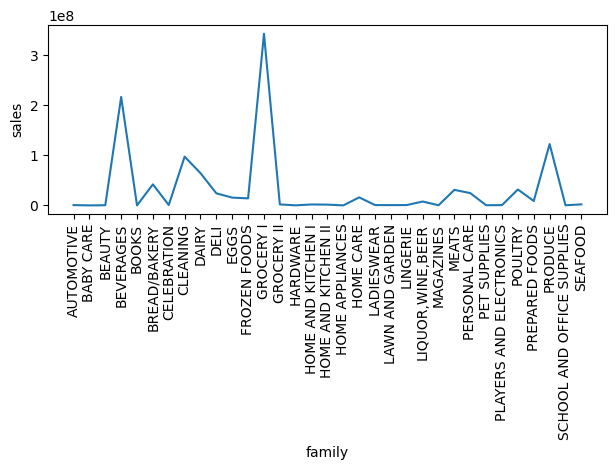

In [27]:
grouped_data = train.groupby('family')['sales'].sum()
grouped_data = pd.DataFrame(grouped_data).reset_index()
sns.lineplot(data=grouped_data,  x='family', y='sales')
plt.xticks(rotation=90)
plt.tight_layout()

#### sales & onpromotion

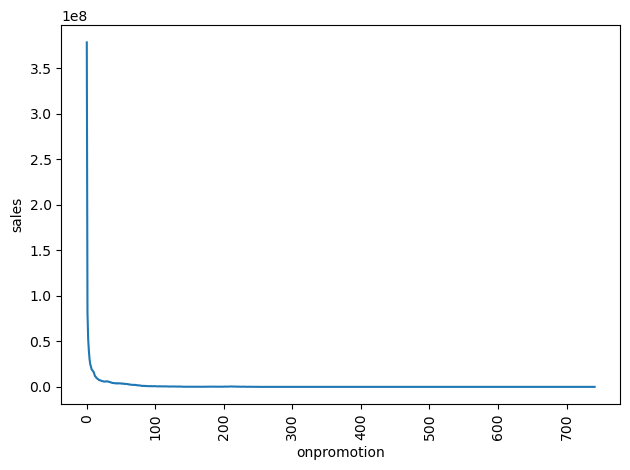

In [29]:
grouped_data = train.groupby('onpromotion')['sales'].sum()
grouped_data = pd.DataFrame(grouped_data).reset_index()
sns.lineplot(data=grouped_data,  x='onpromotion', y='sales')
plt.xticks(rotation=90)
plt.tight_layout()

In [31]:
train['onpromotion'].describe()

count    3.000888e+06
mean     2.602770e+00
std      1.221888e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      7.410000e+02
Name: onpromotion, dtype: float64

#### violin plot promotion for checking outliers

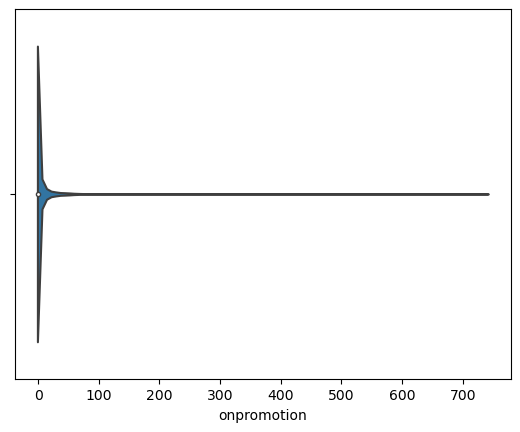

In [34]:
sns.violinplot(x=train["onpromotion"])
plt.show()

### Conclusion

The primary analysis on train.csv gives us the following assumptions:
* Even though the avg sales has increased over year the total sales has not 
* Sales mostly happens on weekends, month start & end, 2nd quarter
* Most sales happens in food produxts followed by beauty care products
* doubtfull onpromotion data since mean is close to ~5 but .99 percentile is 700